In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
df = pd.read_csv(r'data/train.csv')
df.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,جریان بازی,پای راست,13.47,-11.22,1,0,متوسط,70,9,گُل
1,m_17,p_16,جریان بازی,پای چپ,9.48,14.22,3,0,متوسط,55,4,مهار توسط دروازه بان
2,m_111,p_88,ضربه آزاد مستقیم,پای چپ,29.43,-1.25,6,2,کم,86,31,مهار توسط دروازه بان
3,m_142,p_87,جریان بازی,پای راست,26.93,1.00,4,1,متوسط,77,2,موقعیت از دست رفته
4,m_117,p_9,جریان بازی,پای راست,10.72,5.24,2,0,متوسط,76,46,گُل


In [3]:
print(df.shape)
print(df.isna().sum())

(8925, 12)
matchId                   0
playerId                  0
playType                  0
bodyPart                  0
x                         0
y                         0
interveningOpponents      0
interveningTeammates      0
interferenceOnShooter    34
minute                    0
second                    0
outcome                   0
dtype: int64


In [4]:
df.drop(['matchId','playerId'],axis=1,inplace=True)
df.dropna(inplace=True)

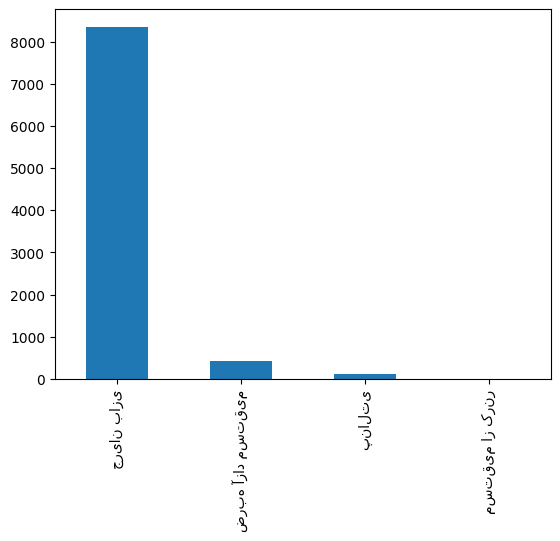

In [5]:
df['playType'].value_counts().plot(kind='bar')
plt.show()

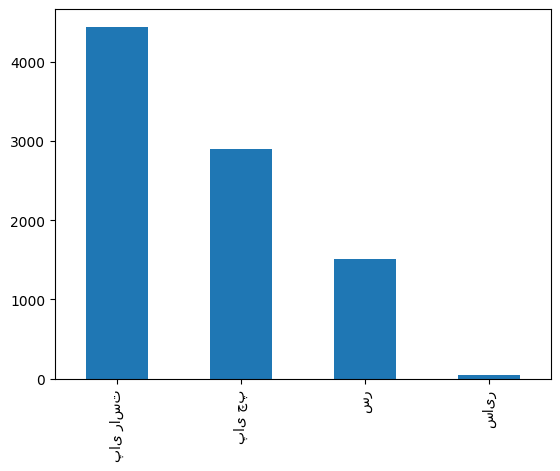

In [6]:
df['bodyPart'].value_counts().plot(kind='bar')
plt.show()

In [7]:
df.loc[df['playType'] == 'مستقیم از کرنر', 'playType'] = 'جریان بازی'
df.loc[df['bodyPart']=='پای راست','bodyPart']='پا'
df.loc[df['bodyPart'] == 'پای چپ', 'bodyPart'] = 'پا'
df.loc[df['bodyPart'] == 'سایر', 'bodyPart'] = 'سر'

In [8]:
df.loc[df['outcome']=='گُل','result']=1
df.loc[df['outcome'] == 'گُل به خودی', 'result'] = 1
df['result'].fillna(0,inplace=True)

In [9]:
df['distance'] = np.sqrt(np.square(df['x']) + np.square(df['y']))

denominator = np.square(df['x']) + np.square(df['y']) - np.power((7.32/2), 2)
df['angle'] = np.where(denominator != 0, (7.32 * df['x']) / denominator, np.nan)